# Inroduction

**In this file, we will use the data that cleaned in the file dirty_data.ipynb for a classification and clustering. In the classification model, I used different models. I trainde each one of them and I check the score and then I decided to use the best one among one. For the clustering model, I used AgglomerativeClustering**

## Please refer to the brief paragraph for more explanation on models testing

# Import packages and models

In [153]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# import classification models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from mlxtend.classifier import StackingClassifier


# import clustering models
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics.cluster import homogeneity_score


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import flask
from flask import render_template
import pickle

# Read in the data

In [154]:
# read in the data from a csv file
df = pd.read_csv('clean_data_version_of_the_dirty_one.csv')

# Start the Exploratory Data Analysis 'EDA' process

In [155]:
# print the shape of the dataframe
df.shape

(1340, 20)

In [156]:
# reassign the data after droping some unuseful columns
df = df.iloc[:, 1:]

In [157]:
# print the head
df.head(2)

,visa_number,id,office,city,appearance,have_wokred,no_experience,experience_not_specified,good_with_kids,good_with_elderly,muslim,not_muslim,religion_not_specified,marrid,not_marrid,status_not_specified,age_range,family_name,country
0,1800025194,1054846645,D,الرياض,False,False,False,True,False,False,False,False,True,False,False,True,25-35,family_not_specified,Bangladesh
1,1104303794,1034719789,D,الرياض,False,False,False,True,False,False,False,False,True,False,False,True,25-35,الشمري,Bangladesh


In [158]:
# drop columns
df.drop(['visa_number', 'id', 'office'], axis=1, inplace=True)

In [159]:
# print the shape of the dataframe
df.shape

(1340, 16)

In [160]:
df.columns

Index(['city', 'appearance', 'have_wokred', 'no_experience',
       'experience_not_specified', 'good_with_kids', 'good_with_elderly',
       'muslim', 'not_muslim', 'religion_not_specified', 'marrid',
       'not_marrid', 'status_not_specified', 'age_range', 'family_name',
       'country'],
      dtype='object')

In [161]:
df.city.value_counts()

الرياض                745
city_not_specified    371
ابها                   40
القصيم                 39
الدمام                 31
تبوك                   27
الطائف                 23
بيشه                   20
وادي الدواسر           13
حائل                   11
جدة                    10
المدينه                10
Name: city, dtype: int64

In [162]:
# print the tail
df.tail(2)

,city,appearance,have_wokred,no_experience,experience_not_specified,good_with_kids,good_with_elderly,muslim,not_muslim,religion_not_specified,marrid,not_marrid,status_not_specified,age_range,family_name,country
1338,الرياض,True,True,True,False,True,True,False,False,True,False,False,True,age_not_specified,العنزي,Srilanka
1339,الرياض,False,True,False,False,False,False,False,False,True,False,False,True,25-35,family_not_specified,Srilanka


# convert age ranges into average ages

In [163]:
# extract the age average our of the age_range column
def age_average(value):
    try:
        # assign the first range to a variable named num_a
        num_a = int(value.split('-')[0])
        # assign the first range to a variable named num_b
        num_b = int(value.split('-')[1])
        # return the average 
        return int((num_a + num_b) / 2)
    # if there is no range, then return the value without changing it
    except:
        return value

# create a new column that holds the average range
df['average_age'] = df['age_range'].apply(age_average)

In [164]:
df.average_age.value_counts()

age_not_specified    587
30                   249
35                   165
32                   160
27                    85
37                    45
40                    19
34                    19
31                    11
Name: average_age, dtype: int64

In [165]:
df.to_excel('data to visualize.xlsx')

# Dummify the dataframe and plot correlated features for each country

In [166]:
# dummify the dataframe
df_dummy = pd.get_dummies(df)

# the correlations of the dataframe
corr = df_dummy.corr()

## create a correlation dataframe for each country

In [167]:
# create a dataframe with correlations to each country
corr_countries = corr[['country_Bangladesh', 'country_Philippines', 'country_Srilanka']]

## now extract the most 20 correlated features in each country and then concat them all into one dataframe

In [168]:
# now create a separate dataframe for each country so that it has the most 10 correlated and none-correlated features
bangladesh_corr = pd.concat([corr_countries.sort_values('country_Bangladesh', ascending=False).iloc[:10, :1],
                corr_countries.sort_values('country_Bangladesh', ascending=True).iloc[:10, :1]])
philippines_corr = pd.concat([corr_countries.sort_values('country_Philippines', ascending=False).iloc[:10, :1],
                corr_countries.sort_values('country_Philippines', ascending=True).iloc[:10, :1]])
srilanka_corr = pd.concat([corr_countries.sort_values('country_Srilanka', ascending=False).iloc[:10, :1],
                corr_countries.sort_values('country_Srilanka', ascending=True).iloc[:10, :1]])

# concat the three dataframes into one so that we can use them to plot a heatmp
corr_df = pd.concat([bangladesh_corr, philippines_corr, srilanka_corr], axis=1)

/Users/Mohammed/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


## Plot a heatmap for the correlation

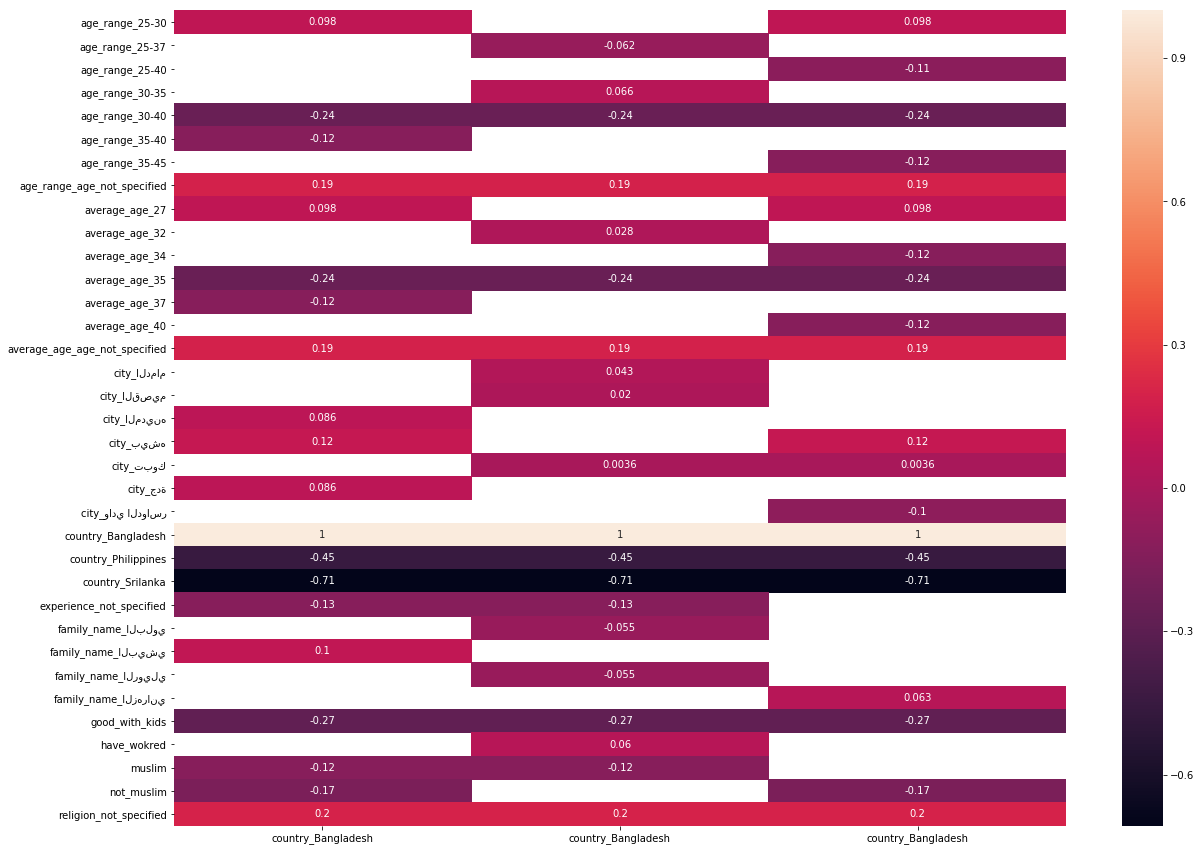

In [169]:
# # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))
# plot the heatmap
sns.heatmap(data=corr_df, annot=True)

# Visualizations
    plot a histogram for the average ages
    plot a bar chart of the cities

In [170]:
# extract average ages to a new series expect when the value is a string
avg_age = pd.Series(df[df.average_age != 'age_not_specified']['average_age'])

In [171]:
# plt.hist(df[df.average_age != 'age_not_specified']['average_age'])
# plt.xlabel('Age Ranges')
# plt.ylabel('Frequecy');

In [172]:
# avg_age.value_counts().index

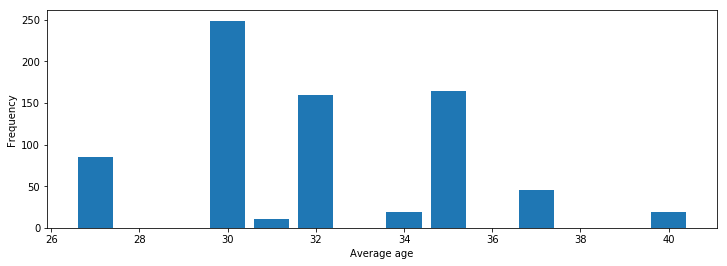

In [173]:
# plot the average age and the number of occurrence for each one
plt.figure(figsize=(12, 4))
plt.bar(avg_age.value_counts().index, height=avg_age.value_counts().values)
plt.xlabel('Average age');
plt.ylabel('Frequency');

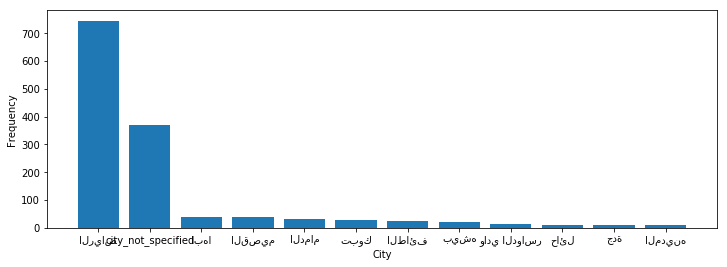

In [174]:
# plot the city and the number of occurrence for each one
plt.figure(figsize=(12, 4))
plt.bar(df.city.value_counts().index, df.city.value_counts().values)
plt.xlabel('City')
plt.ylabel('Frequency');

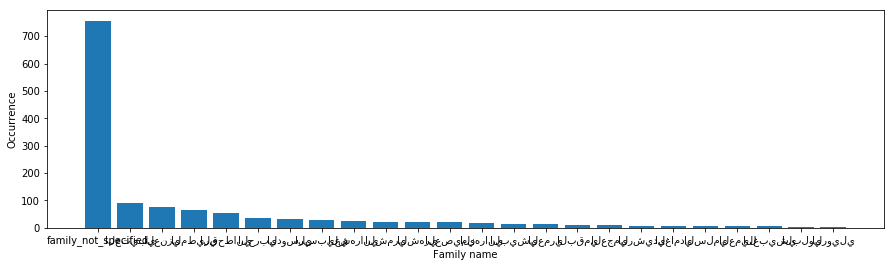

In [175]:
# plot the city and the number of Family name for each one
plt.figure(figsize=(15, 4))
plt.bar(df.family_name.value_counts().index, df.family_name.value_counts().values)
plt.xlabel('Family name')
plt.ylabel('Occurrence');

# Classification modeling to predict country based on features

In [176]:
# get our X (features) and y (target)
X = pd.get_dummies(df.drop(['country'], axis=1))
y = df['country']

In [177]:
df_to_save = pd.concat([X, y], axis=1)

In [178]:
# save the dummified features into a csv file to use in flask
df_to_save.to_csv('features_file_for_flask.csv')

In [179]:
# check how many classes do we have
y.value_counts()

Bangladesh     678
Srilanka       440
Philippines    222
Name: country, dtype: int64

In [180]:
# print the shape of our features and targets
X.shape, y.shape

((1340, 68), (1340,))

In [181]:
# split the data into training set and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15, random_state=42)

In [182]:
# the countries in its imbalanced way
y_train.value_counts()

Bangladesh     571
Srilanka       375
Philippines    193
Name: country, dtype: int64

#### **In the cell below, we'll check the baseline score for the data. Then, we'll see what our model score is, so that we can say either that our model is better or it did not do us any better**

In [183]:
# calculate and print the baseline score
baseline = (y_train.value_counts().iloc[0] / len(y_train))
print('The baseline score is: ', baseline)

The baseline score is:  0.5013169446883231


#### **since our classes are imbalance, we will balance them at first so that our model can be trained better on our data**

In [184]:
# we'll balance our targets since it's imbalance
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [185]:
# the countries after we balanced it
pd.Series(y_train).value_counts()

Srilanka       571
Bangladesh     571
Philippines    571
dtype: int64

# Instantiate the model and fit it

In [186]:
# instantiate the model
svm_model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
              decision_function_shape='ovr', degree=15, gamma='auto_deprecated',
              kernel='linear', max_iter=-1, probability=True, random_state=None,
              shrinking=True, tol=0.001, verbose=False)

# fit the model
svm_model.fit(X_train, y_train);

#### **In the three cells below, I used grid search to find the best tuning parameters. and then I passed the parameters into the model to do better predictions**

In [187]:
# I used grid search to find the best tuning parameter for my model

# grid_param = [{'C':[1, 1.2, 1.4, 1.6, 1.8, 1.9, 2.2, 2.4]},
#              {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#              'degree': [15, 20, 25, 30, 35, 40, 45],
#              'probability': [True, False]}]

In [188]:
# instantiate the Gridsearrch model
# grid = GridSearchCV(svm_model, grid_param, cv=8)

# fit the grid search on my model
# grid.fit(X_train, y_train)

In [189]:
# find the best parameters for my model
# grid.best_estimator_

# Print Scores for the best model that we chose to go with

In [190]:
# print the score on my training set
print('The score for the training set is: ', svm_model.score(X_train, y_train));
# print the score on my testing set
print('The score for the testing set is: ', svm_model.score(X_test, y_test));
# print the mean score on my testing set after cross validating the set
print('The mean score for the testing set is', cross_val_score(svm_model, X_test, y_test).mean());

The score for the training set is:  0.6462346760070052
The score for the testing set is:  0.6965174129353234
The mean score for the testing set is 0.6226998491704374


/Users/Mohammed/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


## A brief explanation of what sort of models we have tried and why did we choose to use Support Vector Machine

   I have tried most if not all classification models to find the best one that would predict the country with high accuracy. I tried all of them with different tuning parameters and the best one among them was Support Vector Machine. I started my modeling process with LogisticRegression with setting the penalty to be Lasso, and it scored a mean cross-validated score of 0.59. I then tried attempted LogisticRegressionCV which was not as good as the LogisticRegression since it scored a mean cross-validated score of 0.57. After that, I tried the K-nearest neighbor classifier, but it was worse than all the previous ones since it scored a mean cross-validated score of 0.55. I then attempted to try Decision Tree Classifier and it seemed to be that my score is going down since I started modeling. This model scored a mean-cross-validated score of 0.53. After I tried the Decision Tree Classifier, I decided to try Extra Tree Classifier hoping for a better score, but I was wrong since it didn't have a high effect on my mean cross-validated score. I then tried to use all the ensemble models but nothing changes regarding the score. I then decided to use Support Vector Machine which results to a better mean cross-validated score of 0.62.

# Get predictions using the Support Vector Machine model

In [191]:
acc_score = accuracy_score(y_test, svm_model.predict(X_test))
print('The accuracy score of our model on predicting our y is: ', acc_score)

The accuracy score of our model on predicting our y is:  0.6965174129353234


In [192]:
# predict the probability of the country that would best fits the client based on his/her specifications
pred_prob = svm_model.predict_proba(X_test)

In [193]:
# get the confusion matrix of our predictions to use in the profit notebook
X_predict_fro_specific_num_of_data = svm_model.predict(X_test.iloc[:32, :])
y_predict_fro_specific_num_of_data = y_test.iloc[:32]
# confusion = confusion_matrix(y_predict_fro_specific_num_of_data, X_predict_fro_specific_num_of_data)
# print(svm_model.classes_, confusion)
# svm_model.classes_

#### We'll predict how many countries in a whole set of data that correspands to the number of data in a given month in the profit data to check if our model will be a better help for the office to make more profit

In [194]:
# print a confusion matrix in a dataframe
df_confusion = pd.crosstab(y_predict_fro_specific_num_of_data, X_predict_fro_specific_num_of_data, rownames=['Actual'], colnames=['Predicted'])
df_confusion

Predicted,Bangladesh,Philippines,Srilanka
Actual,,,
Bangladesh,11,1,4
Philippines,0,5,1
Srilanka,1,2,7


In [195]:
svm_model.classes_

array(['Bangladesh', 'Philippines', 'Srilanka'], dtype=object)

In [196]:
# print the classification report
print(classification_report(y_predict_fro_specific_num_of_data, X_predict_fro_specific_num_of_data))

              precision    recall  f1-score   support

  Bangladesh       0.92      0.69      0.79        16
 Philippines       0.62      0.83      0.71         6
    Srilanka       0.58      0.70      0.64        10

   micro avg       0.72      0.72      0.72        32
   macro avg       0.71      0.74      0.71        32
weighted avg       0.76      0.72      0.73        32



In [197]:
# predict the probability of the country that would best fits the client based on his/her specifications
pred_prob = svm_model.predict_proba(X_test)

In [198]:
# assign the probabilites predictions into a dataframe
proba_df = pd.DataFrame(data=pred_prob, columns= svm_model.classes_)

In [199]:
proba_df.head()

,Bangladesh,Philippines,Srilanka
0,0.657414,0.056351,0.286236
1,0.096392,0.514582,0.389026
2,0.609933,0.185656,0.204411
3,0.367297,0.506237,0.126466
4,0.092685,0.404157,0.503158


# Clustering to study the behaviour of the client

In [200]:
# dummify the three features that we'll use for clustering
cluster_df = pd.get_dummies(df[['city', 'average_age', 'family_name']])
X = cluster_df
y = df['country']

In [201]:
# instantiate the model
model = AgglomerativeClustering(n_clusters=3)
# DBSCAN, AgglomerativeClustering, KMeans
# fit the model
model.fit(X, y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [202]:
# assign clusters to a variable named color
color = pd.Series(model.labels_.tolist())

In [203]:
# print the length of each cluster
color.value_counts()

0    726
1    469
2    145
dtype: int64

In [204]:
# print the score of the model
homogeneity_score(y, model.labels_)

0.032507170665771384

## Predict clusters  and then plot three features in each cluster

In [205]:
# predict clusters
predicted_clusters = model.fit_predict(X, y)

In [206]:
# assign city, average_age, family_name, country to a dataframe so that we can concat the predicted clusters with them
cluster_df_not_dummified = df[['city', 'average_age', 'family_name', 'country']]

In [207]:
# create a new column for classes
cluster_df_not_dummified['cluster'] = pd.Series(list(predicted_clusters))

/Users/Mohammed/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [208]:
# print the head of the dataframe associated with with the classes
cluster_df_not_dummified.head()

,city,average_age,family_name,country,cluster
0,الرياض,30,family_not_specified,Bangladesh,0
1,الرياض,30,الشمري,Bangladesh,0
2,الرياض,30,العتيبي,Bangladesh,0
3,الرياض,30,القحطاني,Bangladesh,0
4,الرياض,30,القحطاني,Bangladesh,0


# Devide the dataframe into three each by one feature

In [209]:
# devide the cluster by city 
cluster_by_city = cluster_df_not_dummified.groupby(['cluster', 'city']).count()
# devide the cluster by the average age 
cluster_by_average_age = cluster_df_not_dummified.groupby(['cluster', 'average_age']).count()
# devide the cluster by family name 
cluster_by_family_name = cluster_df_not_dummified.groupby(['cluster', 'family_name']).count()

In [210]:
# check the nubmer of cluster we have
cluster_df_not_dummified['cluster'].value_counts()

0    726
1    469
2    145
Name: cluster, dtype: int64

#### ** Get the groups per cluster

In [211]:
# assign each dataframe to a a single one based on the predicted cluster
group_0 = cluster_df_not_dummified[cluster_df_not_dummified.cluster == 0]
group_1 = cluster_df_not_dummified[cluster_df_not_dummified.cluster == 1]
group_2 = cluster_df_not_dummified[cluster_df_not_dummified.cluster == 2]

In [212]:
# get the count of observation in each cluster
df_group_0 = group_0.groupby('country').count()
df_group_1 = group_1.groupby('country').count()
df_group_2 = group_2.groupby('country').count()

In [213]:
# Show the most frequented city in cluster 0
group_0.groupby('city').count().sort_values('city', ascending=False)

,average_age,family_name,country,cluster
city,,,,
وادي الدواسر,5,5,5,5
جدة,1,1,1,1
تبوك,4,4,4,4
بيشه,19,19,19,19
المدينه,3,3,3,3
القصيم,11,11,11,11
الرياض,661,661,661,661
الدمام,6,6,6,6
ابها,1,1,1,1


In [214]:
# Show the most frequented family name in cluster 0
group_0.groupby(['family_name']).count().sort_values('family_name', ascending=False)[:2]

,city,average_age,country,cluster
family_name,,,,
المطيري,44,44,44,44
القحطاني,31,31,31,31


In [215]:
# Show the most frequented average age in cluster 0
group_0.groupby(['average_age']).count().sort_values('family_name', ascending=False)[:2]

,city,family_name,country,cluster
average_age,,,,
age_not_specified,322,322,322,322
30,170,170,170,170


In [216]:
# Show the most frequented city in cluster 1
group_1.groupby('city').count().sort_values('city', ascending=False)

,average_age,family_name,country,cluster
city,,,,
وادي الدواسر,8,8,8,8
حائل,10,10,10,10
جدة,8,8,8,8
تبوك,20,20,20,20
بيشه,1,1,1,1
المدينه,6,6,6,6
القصيم,22,22,22,22
الطائف,18,18,18,18
الرياض,4,4,4,4


In [217]:
# Show the most frequented family name in cluster 1
group_1.groupby(['family_name']).count().sort_values('family_name', ascending=False)[:2]

,city,average_age,country,cluster
family_name,,,,
المطيري,12,12,12,12
القحطاني,18,18,18,18


In [218]:
# Show the most frequented average age in cluster 1
group_1.groupby(['average_age']).count().sort_values('family_name', ascending=False)[:2]

,city,family_name,country,cluster
average_age,,,,
age_not_specified,265,265,265,265
30,79,79,79,79


In [219]:
# Show the most frequented city in cluster 2
group_2.groupby('city').count().sort_values('city', ascending=False)

,average_age,family_name,country,cluster
city,,,,
حائل,1,1,1,1
جدة,1,1,1,1
تبوك,3,3,3,3
المدينه,1,1,1,1
القصيم,6,6,6,6
الطائف,5,5,5,5
الرياض,80,80,80,80
الدمام,3,3,3,3
ابها,5,5,5,5


In [220]:
# Show the most frequented family name in cluster 2
group_2.groupby(['family_name']).count().sort_values('family_name', ascending=False)[:2]

,city,average_age,country,cluster
family_name,,,,
المطيري,9,9,9,9
القحطاني,7,7,7,7


In [221]:
# Show the most frequented average age in cluster 2
group_2.groupby(['average_age']).count().sort_values('family_name', ascending=False)[:2]

,city,family_name,country,cluster
average_age,,,,
35,145,145,145,145


# Visualize clusters, based on:
    - the city that the clients are from
    - the client family name
    - the preference average age of the maid the client request

In [222]:
def plot_pie_chart(df, string_of_df):
    
    '''
    this function accepts a dataframe and the name of the dataframe as a string
    to save the chart and set the title
    '''
    
    # set colours of the chart
    colors = ['lightskyblue', 'orange','lightgreen', 'gold']
    # set the size of the chart
    plt.figure(figsize=(8, 8));
    # plot the chart
    plt.pie(df, colors=colors, shadow=True, startangle=90, autopct='%.1f%%')
    # set legend
    plt.legend(df.index, loc="best")
    # set the axis to be in the middle
    plt.axis('equal')
    plt.tight_layout()
    # set title
    plt.title(string_of_df)
    # show the plot
#     plt.show();
    save_file = ('{}.png'.format(string_of_df))
    # save the chart
    plt.savefig(save_file)

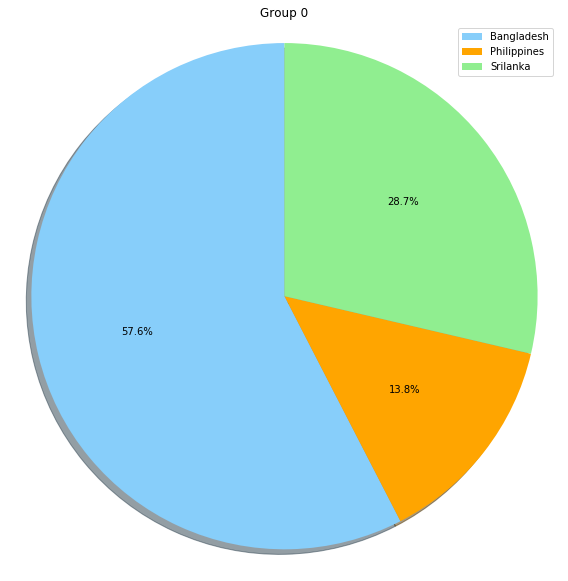

In [223]:
# plot group 0
plot_pie_chart(df_group_0.city, 'Group 0')

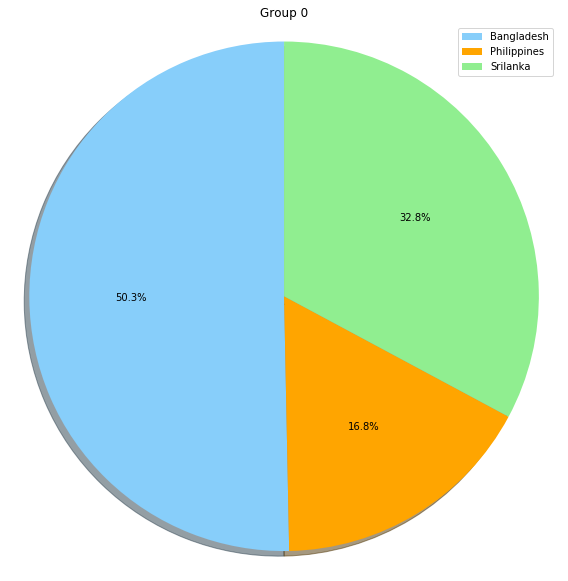

In [224]:
# plot group 1
plot_pie_chart(df_group_1.city, 'Group 0')

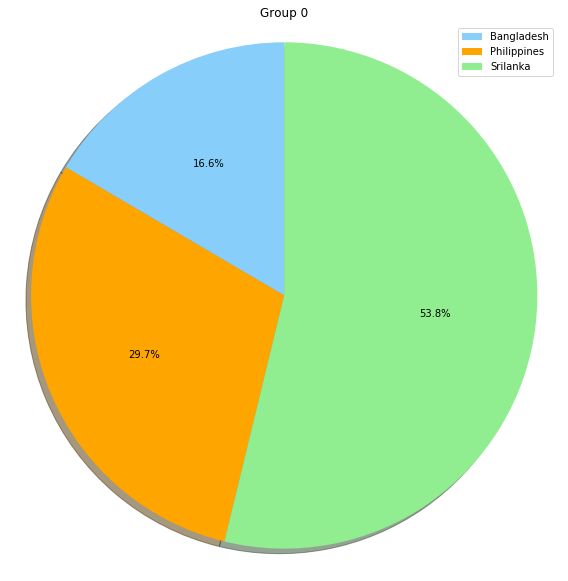

In [225]:
# plot group 2
plot_pie_chart(df_group_2.city, 'Group 0')

# Conclusion

 **In conclusion, in this notebook I read a pre-processing data that I saved from the dirty_data.ipynb file. then I dummified what needed to be dummified to perform a classification model. I think that I got a satisifying a score comparing my model to the baseline score. I then, perform a clustering model to study the behaviour of our client regarding their perference on average age of the maid. I also, studied where most of the clients are based on the city, and what their family are.**